# Outlier Detection using Clustering

Using KMeans to find outliers in a cluster of points.
Finding outliers means finding the centroids and then looking
for elements by their distance from the centroids

In [23]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [24]:
X, label = make_blobs(100, centers = 1, random_state=5)

The dataset has only one cluster. Lets apply the K-Measns

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(n_clusters=1)

Visualize the graph

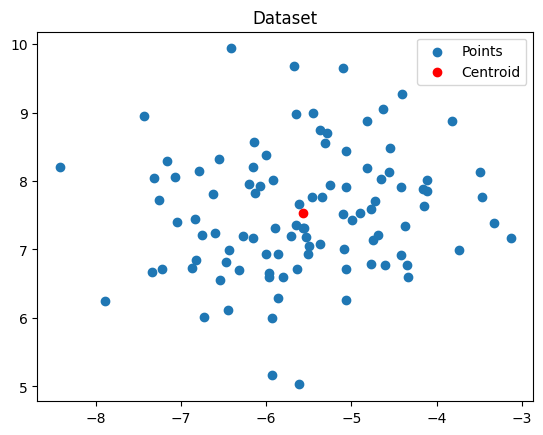

In [27]:
f, ax = plt.subplots()
ax.set_title("Dataset")

ax.scatter(X[:,0], X[:,1], label="Points")
ax.scatter(
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1], 
    label="Centroid",
    color ='red'
)

ax.legend(loc='best')

### Outlier by sorting the distance

Now calculate the distance from the centroid and sort them

argsort returns an array of indexes which will sort the array in ascending order. Reverse it with [::-1]

In [28]:
distances = kmeans.transform(X)
# only 5 by sorting
# The ::-1 syntax tells NumPy to start from the end (-1) and move towards the beginning of the array, effectively reversing the order of the elements.
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

In [29]:
sorted_idx

array([89, 61, 83, 41, 17])

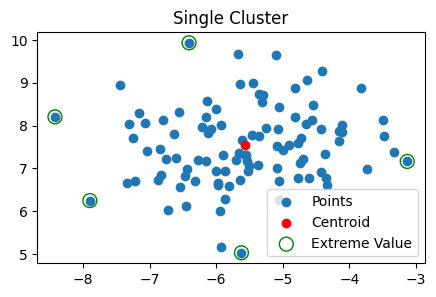

In [30]:
f, ax = plt.subplots(figsize=(5,3))
ax.set_title('Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

### Outlier by Thresholding

Using some Threshold Ratio for deciding the outliers

In [ ]:
distances = kmeans.transform(X)

percentile = 80
# getting outliers whose distances are greater than some percentile
threshold_distance = np.percentile(distances, percentile)
print(f"The threshold distance = {threshold_distance}")

outliers_index = np.where(distances > threshold_distance)[0]
outliers = X[outliers_index]
outliers

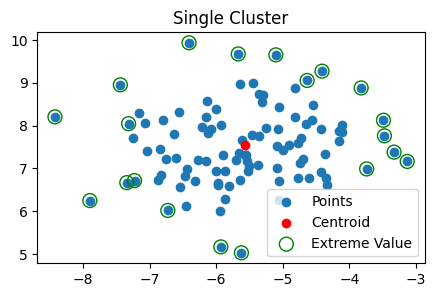

In [40]:
f, ax = plt.subplots(figsize=(5,3))
ax.set_title('Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(outliers[:, 0],
           outliers[:, 1],
           label='Extreme Value', 
           edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

# Working with Dataset

Dataset: weight/height : [Download](https://www.kaggle.com/datasets/krishnaraj30/weight-and-height-data-outlier-detection?resource=download)

There are just 2 features (Height, Weight) & 1 label (Sex)

- Height (inches)
- Weight
- Sex (male | female)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_76343/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df=pd.read_csv("../DataSet/weight-height.csv")
df.head(), print('shape of data:',df.shape)


shape of data: (10000, 3)


(  Gender     Height      Weight
 0   Male  73.847017  241.893563
 1   Male  68.781904  162.310473
 2   Male  74.110105  212.740856
 3   Male  71.730978  220.042470
 4   Male  69.881796  206.349801,
 None)

Text(0.5, 0, 'Date')

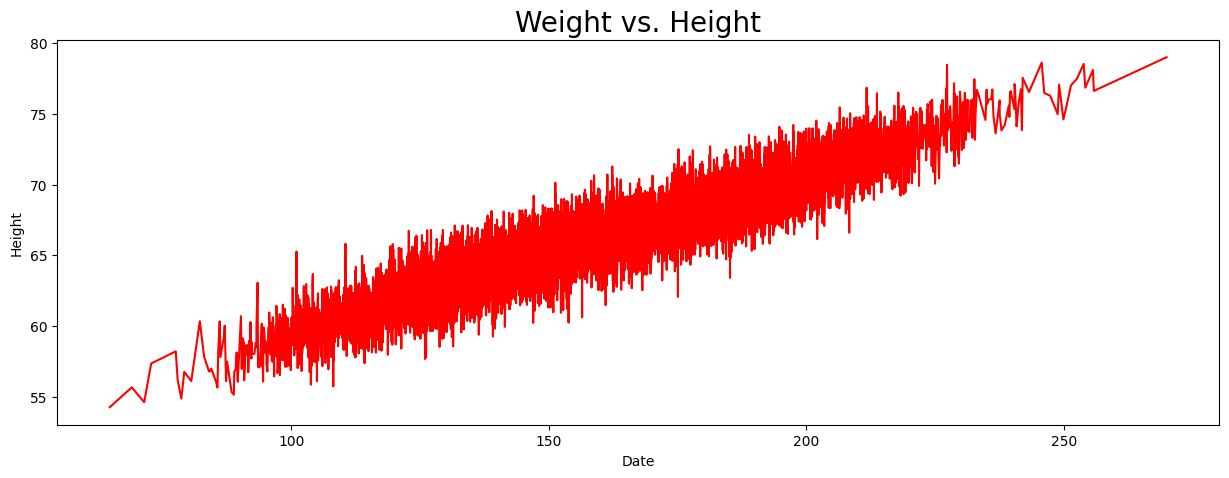

In [8]:
import seaborn as sns

plt.figure(figsize =(15,5))
sns.lineplot(x=df['Weight'], y=df['Height'], color='r')
plt.title("Weight vs. Height", fontsize=20)
plt.xlabel('Date')

## Inter Quartile Range (IQR)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


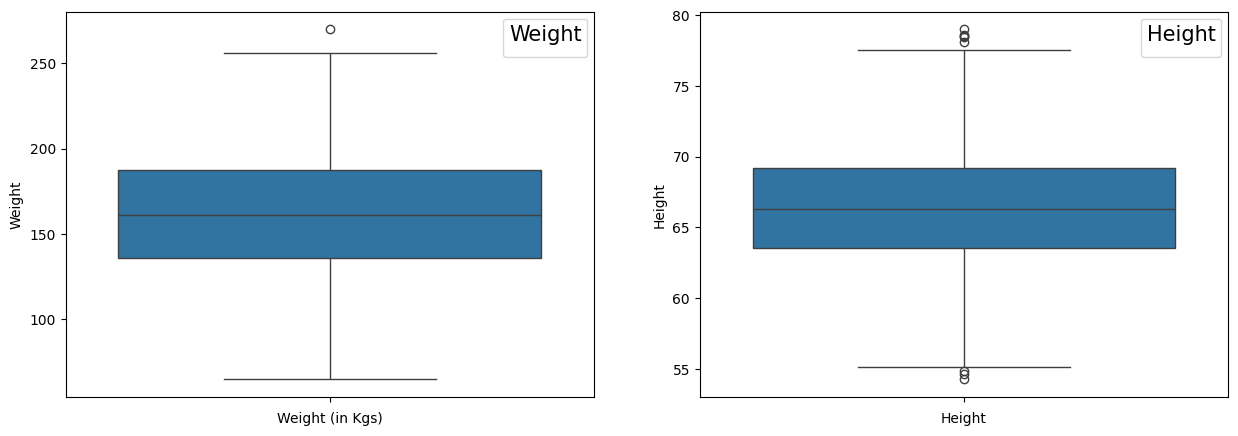

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['Weight'])
plt.xticks(fontsize = (12))
plt.xlabel('Weight (in Kgs)')
plt.legend (title="Weight", fontsize=10, title_fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df['Height'])
plt.xlabel('Height')
plt.xticks(fontsize =(12));
plt.legend (title="Height", fontsize=10, title_fontsize=15);

In [34]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


sample_outliers = detect_outliers_iqr(df['Height'].array)
print("Outliers from IQR method: Height: ", sample_outliers)
sample_outliers = detect_outliers_iqr(df['Weight'].array)
print("Outliers from IQR method: Weight: ", sample_outliers)


Outliers from IQR method: Height:  [54.2631333250971, 54.6168578301035, 54.8737275315254, 78.0958674715774, 78.4620529193772, 78.5282104258694, 78.621373968548, 78.9987423463896]
Outliers from IQR method: Weight:  [54.2631333250971, 54.6168578301035, 54.8737275315254, 78.0958674715774, 78.4620529193772, 78.5282104258694, 78.621373968548, 78.9987423463896, 269.989698505106]


## DB Scan

In [24]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
from sklearn.cluster import DBSCAN

In [31]:
df_new = df.drop(columns=['Gender'])
model = DBSCAN(eps = 0.8, min_samples = 10).fit(df_new)
model.labels_

array([-1,  0,  0, ...,  0,  0,  0])

Text(0.5, 1.0, 'Outliers Detection using DBSCAN')

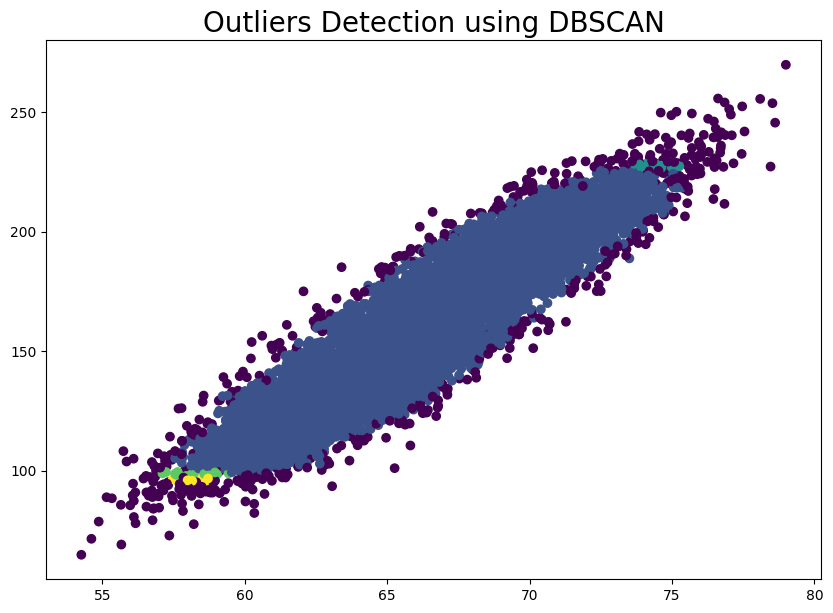

In [32]:
colors = model.labels_
plt.figure(figsize=(10,7))
plt.scatter(df_new['Height'], df_new['Weight'], c = colors)
plt.title('Outliers Detection using DBSCAN',fontsize=20)

More dataset: https://odds.cs.stonybrook.edu/